In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%importlib inline
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

print('\n ### 학습 데이터 정보 ## \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('Null 값', titanic_df.isnull().sum().sum())

Null 값 0


In [5]:
print('Sex 값 분류', titanic_df['Sex'].value_counts())
print('Cabin 값 분포:', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포:', titanic_df['Embarked'].value_counts() )

Sex 값 분류 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포: N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())


0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [7]:
titanic_df.groupby(['Sex', "Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

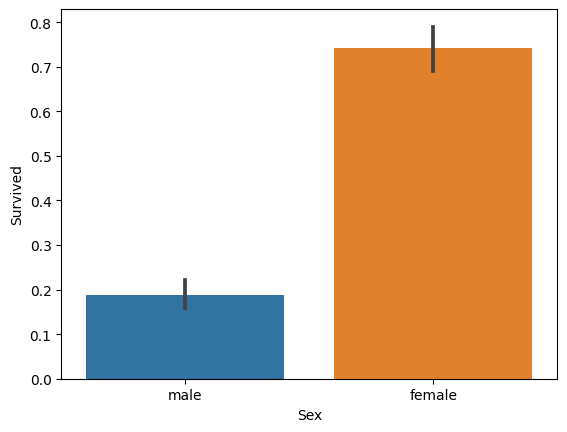

In [8]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

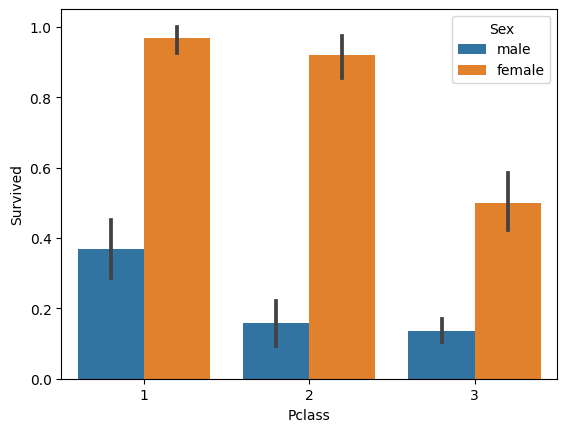

In [9]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

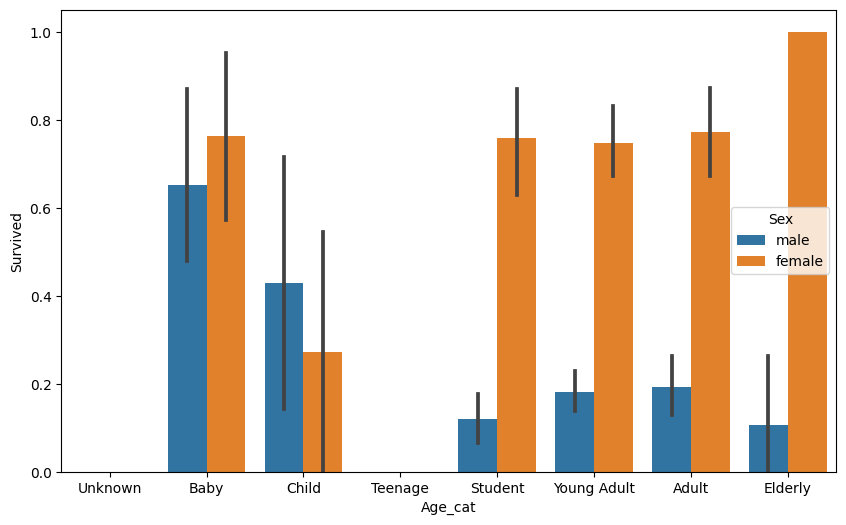

In [10]:
#입력 age 값에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식 이용
def get_category(age):
    cat=''
    if age<= -1:
        cat='Unknown'
    elif age<=5:
        cat='Baby'
    elif age <= 12:
        cat = 'Child'
    elif age<=18:
        cat = 'Teenager'
    elif age<= 25:
        cat = 'Student'
    elif age<= 35:
        cat = 'Young Adult'
    elif age<=60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenage','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(dataDF):
    features = ['Cabin', 'Sex', 'Embarked'] #이 항목들을 숫자형으로 바꿔줌
    for feature in features:
        le = LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [14]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_feature(X_titanic_df)

X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷 런 Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#decisiomTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도:  0.7877
RandomForestClassifier 정확도:  0.8547
LogisticRegression 정확도:  0.8659


## KFold 클래스 교차 검증

In [23]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 생성
    kfold = KFold(n_splits=folds)
    scores = []

    #KFold 교차 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1: .4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도: {0: .4f}".format(mean_score))
exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도:  0.7542
교차 검증 1 정확도:  0.7809
교차 검증 2 정확도:  0.7865
교차 검증 3 정확도:  0.7697
교차 검증 4 정확도:  0.8202
평균 정확도:  0.7823


## 교차검증 cross_val_score() API 이용 수행

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차검증: {0} 정확도: {1: .4f}'.format(iter_count, accuracy))

print('평균 정확도: {0: .4f}'.format(np.mean(scores)))

#정확도 조금씩 다른 이유: cross_val_score이 StratifiedKFold를 이용해 세트 분리하기 때문

교차검증: 0 정확도:  0.7430
교차검증: 1 정확도:  0.7753
교차검증: 2 정확도:  0.7921
교차검증: 3 정확도:  0.7865
교차검증: 4 정확도:  0.8427
평균 정확도:  0.7879


## GridSearchC를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고, 예측 성능

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0: .4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_
#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0: 4f}'.format(accuracy))

최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:  0.871508


## 정확도, 정밀도, 오차행렬, 재현율

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1: .4f}, 재현율:{2: .4f}'.format(accuracy, precision, recall))

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_feature(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lf_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


## pred_proba -> 개별 데이터 별로 예측 확률을 반환

In [94]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shpae:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array병합해 예측 확률과 결괏삾 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3]) #negative, positive

pred_proba() 결과 Shpae:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935226 0.55064774 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429644 0.13570356 0.        ]]


In [93]:
pred_proba

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

In [42]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threhold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [43]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5
#Binarizer의 threshold 설정값, 분류 결정 임계값
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
customer_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, customer_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [44]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
threshold = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    #thresholds list 객체 내의 값을 차례로 평가
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
    get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), threshold)

## precision_recall_curve() API 제공
    - 임계값 별로 정밀도, 재현율 반환
    - precision_recall_curve(y_true, probas_pred) -> 정밀도, 재현율

In [45]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값의 배열의 shape: ', thresholds.shape)

#반환된 입곅밧 배열 로우가 147건이므로 샘플 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 3))
print('샘플 임계값 별 재현율: ', np.round(recalls[thr_index],3))
#임계값이 증가할수록 정밀도 값은 동시에 높아지거나 재현율 값은 낮아짐

반환된 분류 결정 임계값의 배열의 shape:  (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02  0.113 0.129 0.144 0.16  0.243 0.325 0.447 0.621 0.728 0.866]
샘플 임계값 별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


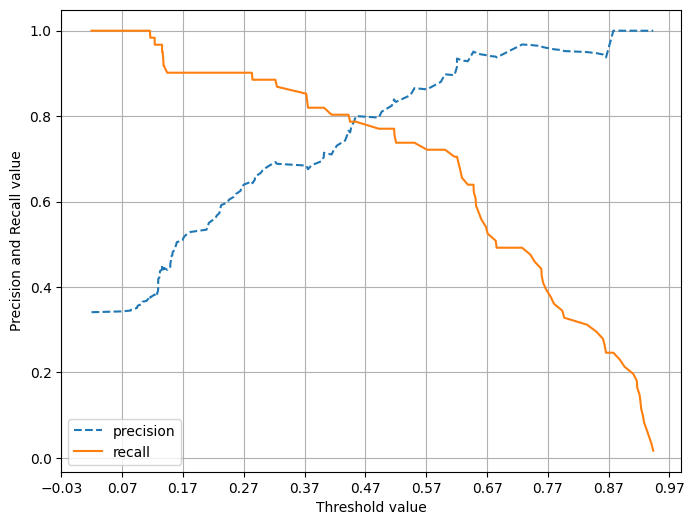

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])



## F1 score => f1_score()

In [56]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어: {0: .4f}'.format(f1))

F1 스코어:  0.7966


In [92]:
def get_clf_eval(y_test, pred):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1: .4f}, 재현율:{2: .4f}, f1점수: {3: .4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict(X_test)

pred_proba
# get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)



array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

## ROC 곡선 구하기 = roc_curve()


In [69]:
from sklearn.metrics import roc_curve
#레이블 값이 1일때의 예측확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#thresholds[0]은 max(예측확률)+1로 임의 설정된, 이를 없애기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index: ', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(fprs[thr_index],3))
print('샘플 임계값 별 TPR', np.round(tprs[thr_index],3))


샘플 추출을 위한 임곗값 배열의 index:  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값 별 TPR [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


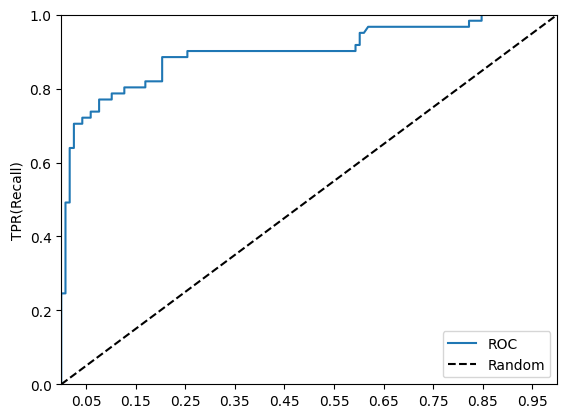

In [101]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs,tprs, label='ROC')
    plt.plot([0,1],[0,1], "k--", label='Random')

    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.ylabel('FPR(1- Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
pred_proba = lr_clf.predict_proba(X_test)
pred_proba
roc_curve_plot(y_test, pred_proba[:,1])

In [104]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'.format(roc_score))

ROC AUC 값:  0.8987


In [105]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1: .4f}, 재현율:{2: .4f}, f1점수: {3: .4f}, AUC점수:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))
